In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
import itertools
import statsmodels.api as sm
import seaborn as sns

In [13]:
data=pd.read_excel("Crude Oil Prices Daily.xlsx")

In [14]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [17]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [18]:
oil_price=data.reset_index()['Closing Value']
oil_price

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
oil_price=scaler.fit_transform(np.array(oil_price).reshape(-1,1))

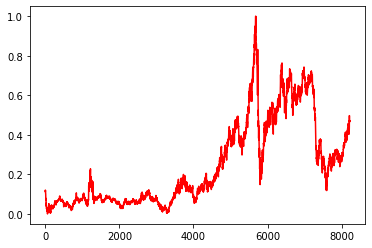

In [20]:
plt.plot(oil_price,color="red")

In [21]:
data.to_csv ("crude_oil_price_daily.csv", index = None, header=True)
df=pd.read_csv("crude_oil_price_daily.csv")

In [22]:
df.index

RangeIndex(start=0, stop=8216, step=1)

Text(0.5, 1.0, 'Price Trend over years')

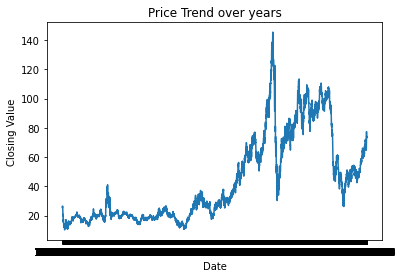

In [23]:
g = sns.lineplot(x='Date',y='Closing Value',data = df)
plt.title("Price Trend over years")

In [24]:
def price_plot_from_date_range(df, start_date, end_date):
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Closing Value',data = sdf)
    plt.title("Brent Oil Price Trend")

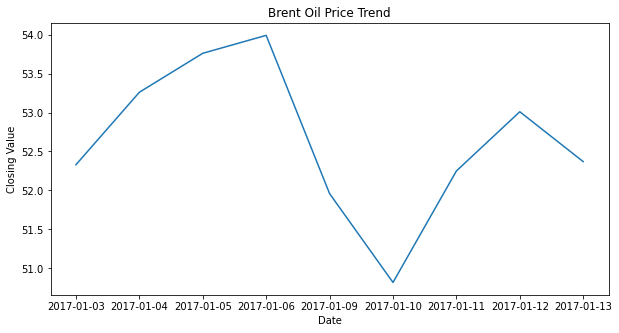

In [25]:
price_plot_from_date_range(df,'2017-01-01','2017-01-15')

In [26]:
training_size=int(len(oil_price)*0.75)
test_size=len(oil_price)-training_size
train_data,test_data=oil_price[0:training_size,:],oil_price[training_size:len(oil_price),:1]

In [27]:
print("Training Data Size: ",training_size)
print("Test Data Size: ",test_size)

Training Data Size:  6162
Test Data Size:  2054


In [28]:
train_data.shape

(6162, 1)

In [29]:
def Dataset_Creation(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [30]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [31]:
print(x_train.shape)
print(y_train.shape)

(6151, 10)
(6151,)


In [32]:
print(x_test.shape)
print(y_test.shape)

(2043, 10)
(2043,)


In [33]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [40]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [41]:
Model=Sequential()

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32,verbose=1)

In [42]:
Model.add(LSTM(units = 60, return_sequences = True, input_shape = (10, 1)))
Model.add(Dropout(0.1))

Model.add(LSTM(units = 60, return_sequences = True))
Model.add(Dropout(0.1))

Model.add(LSTM(units = 60))
Model.add(Dropout(0.1))

Model.add(Dense(units = 1))

In [43]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 10, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 10, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                

In [50]:
from keras.callbacks import ReduceLROnPlateau
Model.compile(loss='mean_squared_error',optimizer='adam')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)

In [51]:
Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=32,verbose=1)

Epoch 1/30
193/193 [==============================] - 8s 18ms/step - loss: 2.0079e-04 - val_loss: 2.0387e-04
Epoch 2/30
193/193 [==============================] - 3s 13ms/step - loss: 2.0872e-04 - val_loss: 1.1751e-04
Epoch 3/30
193/193 [==============================] - 3s 14ms/step - loss: 2.1458e-04 - val_loss: 1.9314e-04
Epoch 4/30
193/193 [==============================] - 3s 14ms/step - loss: 2.2735e-04 - val_loss: 0.0010
Epoch 5/30
193/193 [==============================] - 3s 13ms/step - loss: 2.3821e-04 - val_loss: 1.7083e-04
Epoch 6/30
193/193 [==============================] - 3s 14ms/step - loss: 2.1173e-04 - val_loss: 1.3271e-04
Epoch 7/30
193/193 [==============================] - 3s 13ms/step - loss: 2.0808e-04 - val_loss: 1.5829e-04
Epoch 8/30
193/193 [==============================] - 3s 14ms/step - loss: 1.9883e-04 - val_loss: 1.9195e-04
Epoch 9/30
193/193 [==============================] - 3s 14ms/step - loss: 1.9215e-04 - val_loss: 1.7118e-04
Epoch 10/30
193/193 [==

In [54]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

40.57502911125908

In [55]:
Model.save("crude_oil_price_prediction_2.h5")

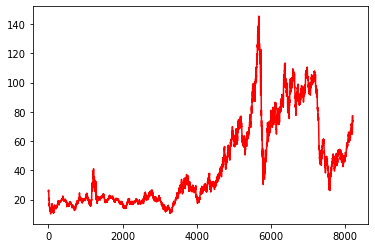

In [56]:
look_back=10
trainpredictPlot = np.empty_like(oil_price)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictplot = np.empty_like(oil_price)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict

plt.plot(scaler.inverse_transform(oil_price),color="red")
plt.show()

In [57]:

len(test_data)

2054

In [58]:
x_input=test_data[2044:].reshape(1,-1)
x_input.shape

(1, 10)

In [59]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [62]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
       #print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) 
       #print(x_input)
       yhat = Model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] 
       #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = Model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.47101527]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47101527]
1 day output [[0.47114295]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47101527 0.47114295]
2 day output [[0.4711616]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47101527 0.47114295 0.4711616 ]
3 day output [[0.47104108]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47101527 0.47114295 0.4711616  0.47104108]
4 day output [[0.47093493]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47101527
 0.47114295 0.4711616  0.47104108 0.47093493]
5 day output [[0.4708295]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47101527 0.47114295
 0.4711616  0.47104108 0.47093493 0.47082949]
6 day output [[0.47074097]]
7 day input [0.46497853 0.47038353 0.47149415 0.47101527 0.47114295 

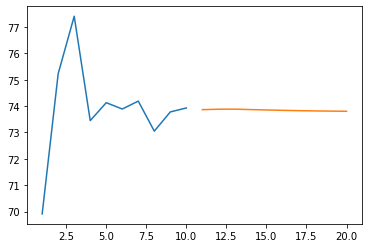

In [63]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(oil_price)
plt.plot(day_new, scaler.inverse_transform(oil_price[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

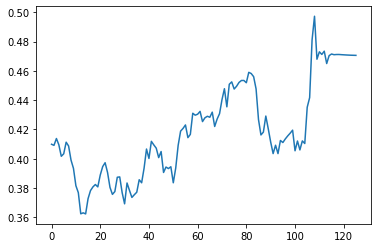

In [64]:
df3=oil_price.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()

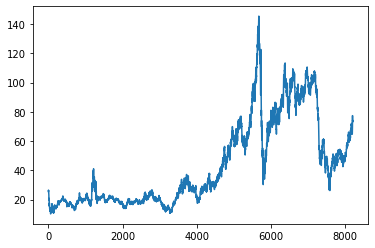

In [66]:
plt.plot(scaler.inverse_transform(oil_price))